In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs

In [10]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv('housing.csv', delimiter=r'\s+', names=column_names)    #importing dataset

In [11]:
dataset.head()    #Top 5 rows of dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
dataset.shape   #Shape of dataset (rows, columns)

(506, 14)

In [ ]:
dataset.describe()    #describing the dataset to see distribution of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
dataset = dataset.drop(['ZN', 'CHAS'], axis=1)    #removing variables 'ZN' and 'CHAS' form data

In [ ]:
dataset.isnull().sum()      #checking null values

CRIM       0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

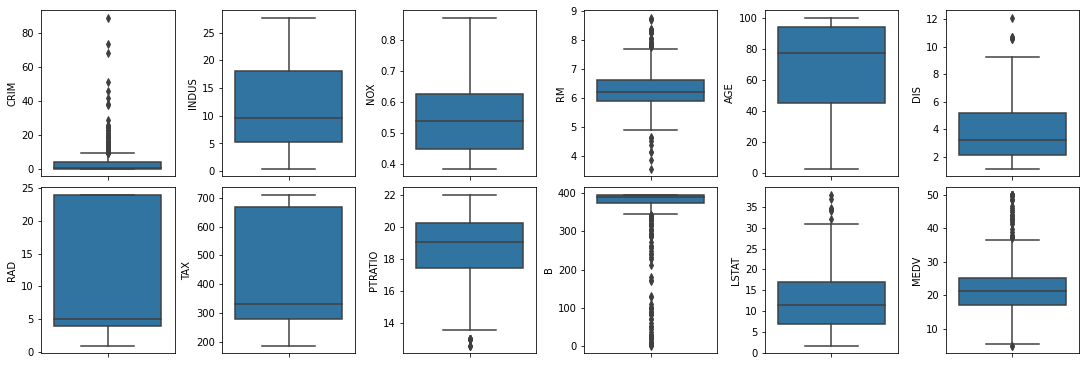

In [ ]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(15, 5))
ax = ax.flatten()
index = 0
for i in dataset.columns:
  sns.boxplot(y=i, data=dataset, ax=ax[index])
  index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [ ]:
#checking percentage/ amount of outliers
for i in dataset.columns:
  dataset.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dataset[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_data = dataset[i][(dataset[i] < lower_bound) | (dataset[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_data.count()/dataset[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_data.count()))
  #----------------------code below is for comming sections----------------------
  if i == 'B':
    outlierDataB_index = outlier_data.index
    outlierDataB_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataB_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDataCRIM_index = outlier_data.index
    outlierDataCRIM_LB = dataset[i][(dataset[i] < lower_bound)]
    outlierDataCRIM_UB = dataset[i][(dataset[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


In [12]:
dataset2 = dataset.copy() # I copied the data in another variable just for an ease of coding, but this is not required

In [ ]:
#removing extreme outliers form B and CRIM (removing those observations)
removed=[]
outlierDataB_LB.sort_values(ascending=True, inplace=True)
outlierDataB_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataB_LB.index:
  if counter<=19:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_UB.index:
  if counter<=38:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataB_LB.index:
  if counter<=38 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)

outlierDataCRIM_LB.sort_values(ascending=True, inplace=True)
outlierDataCRIM_UB.sort_values(ascending=False, inplace=True)
counter=1
for i in outlierDataCRIM_LB.index:
  if counter<=16 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_UB.index:
  if counter<=33 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
for i in outlierDataCRIM_LB.index:
  if counter<=33 and i not in removed:
    dataset2.drop(index=i, inplace=True)
    counter+=1
    removed.append(i)
dataset2.shape


(435, 12)

In [13]:
dataset3 = dataset2.copy() # I copied the data in another variable just for an ease of coding, but this is not required

In [ ]:
#replacing remaning outliers by mean
for i in dataset.columns:
  dataset.sort_values(by=i, ascending=True, na_position='last')
  q1, q3 = np.nanpercentile(dataset[i], [25,75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  mean = dataset3[i].mean()
  if i != 'MEDV':
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = mean
  else:
    dataset3.loc[dataset3[i] < lower_bound, [i]] = mean
    dataset3.loc[dataset3[i] > upper_bound, [i]] = 50

In [ ]:
dataset3.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.054293,10.008575,0.534257,6.266477,64.741609,4.038049,7.409195,369.232184,18.402521,388.243160,11.128671,24.502299
std,1.936962,6.741091,0.108957,0.511640,28.319794,1.960932,7.185681,146.359443,1.945860,10.759893,5.973657,9.616602
min,0.006320,0.460000,0.385000,4.903000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,6.300000
25%,0.068740,4.860000,0.445000,5.926500,40.050000,2.404500,4.000000,276.000000,17.400000,382.557563,6.545000,18.900000
50%,0.173310,8.140000,0.515000,6.230000,70.200000,3.665000,5.000000,307.000000,18.600000,392.520000,9.970000,22.200000
75%,0.846290,18.100000,0.585000,6.550500,91.550000,5.400900,6.000000,403.000000,20.200000,396.260000,14.655000,27.100000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


**Selecting the features which can predict MEDV the best**

In [14]:
X = dataset3.iloc[:, :-1]     #independent variable(X) 
Y = dataset3.iloc[:, 11]      #dependent variable(Y)

In [ ]:
#Feature selection using P-Value/ Backward elimination
def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog=Y, exog=w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > SL:
            index_max_pvalue = pvalues[pvalues==max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) #delete the valriable for that p value
    return w,pvalues,index_max_pvalue

SL = 0.05
ones = np.ones((435,1))  #adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]
W_optimal,pvalues,index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis=1)

In [ ]:
X.columns   #remaning variables after backward elimination

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

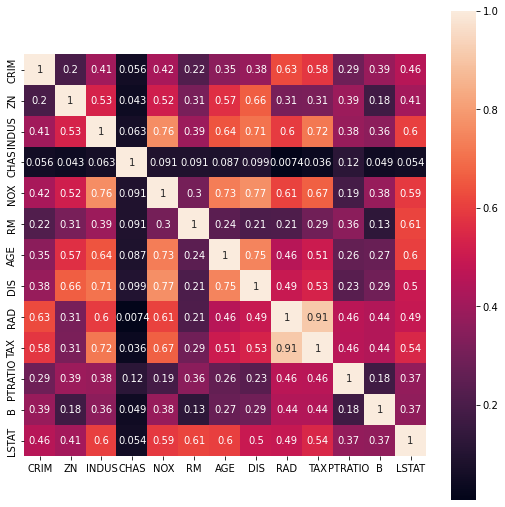

In [18]:
#Ploting heatmap using pearson correlation among independent variables
plt.figure(figsize=(9,9))
ax = sns.heatmap(X.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

In [ ]:
X.drop('TAX', axis=1, inplace=True)
X.drop('NOX', axis=1, inplace=True)   #dropping TAX and NOX
X.columns   #remaning columns after removing multicollinearity

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

In [ ]:
#now checking correlation of each variable with MEDV by pearson method and dropping the one with least correlation with MEDV
for i in X.columns:
  corr, _ = pearsonr(X[i], Y)
  print(i,corr)

RM 0.5619541568173053
DIS 0.10793693577397613
RAD -0.16919893157675941
PTRATIO -0.3805580367664191
LSTAT -0.6793276769216394


In [ ]:
X.drop(['DIS', 'RAD'], axis=1, inplace=True)

In [ ]:
X.columns   #remaning variables/ features that can predict the MEDV most

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

**MACHINE LEARNING**

In [ ]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.2, random_state=0)    #spliting data into traning set and test set

**Linear regression model:**

In [ ]:
linear = lr()
linear.fit(X_train, Y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_linear.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,30.992768
269,20.7,21.073716
54,18.9,17.575853
360,25.0,25.980258
499,17.5,17.814795


**Decission tree model**

In [ ]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,22.669
269,20.7,22.055
54,18.9,17.758
360,25.0,23.722
499,17.5,20.371


**K-Nearest Neighbour regression model:**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=13)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_knn.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,30.530769
269,20.7,20.346154
54,18.9,18.646154
360,25.0,22.384615
499,17.5,19.315385


**Support vector regression model**

In [ ]:
svr = SVR(kernel= 'poly', gamma='scale')
svr.fit(X_train,Y_train)
Y_pred = svr.predict(X_test)
Y_compare_svr = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_svr.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,26.297366
269,20.7,19.596855
54,18.9,15.838815
360,25.0,24.115036
499,17.5,17.335738


**Polynomial regression model**

In [ ]:
polyRegressor = PolynomialFeatures(degree=3)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train_poly, Y_train)
Y_pred = poly.predict(X_test_poly)
Y_compare_poly = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
Y_compare_poly.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
158,24.3,32.860285
269,20.7,19.674236
54,18.9,15.952153
360,25.0,23.712803
499,17.5,18.331182


In [ ]:
print('According to R squared scorring method we got below scores for out machine learning models:')
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter=0
score=[]
for i in models['modelRegressors']:
  if i is poly:
    none
  else:
    accuracy = cvs(i, X_train, Y_train, scoring='r2', cv=5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter,0],accuracy.mean()))
    score.append(accuracy.mean())
  counter+=1

According to R squared scorring method we got below scores for out machine learning models:
Accuracy of Linear Regression model is 0.51
Accuracy of Polynomial Regression model is 0.64
Accuracy of Support Vector Regression model is 0.50
Accuracy of Random Forrest Regression model is 0.72
Accuracy of K-Nearest Neighbour Regression model is 0.64
